In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

In [2]:
df_titanic = pd.read_csv("train titanic.csv")
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_titanic.shape

(891, 12)

In [4]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_cleaned = df_titanic.dropna(axis=0)
df_cleaned.shape

(183, 12)

In [10]:
df_titanic.shape

(891, 12)

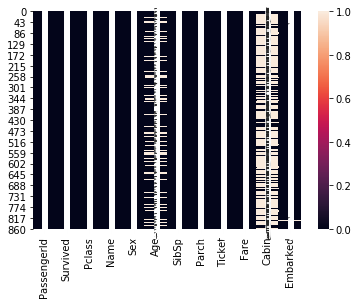

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_titanic.isnull(),annot=True)
plt.show()

In [12]:
df_titanic['Cabin'].value_counts

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [13]:
del df_titanic['Name']

In [14]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [15]:
del df_titanic['Cabin']

In [16]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [17]:
df_titanic['Age'].value_counts

<bound method IndexOpsMixin.value_counts of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [18]:
df_titanic['Ticket'].value_counts

<bound method IndexOpsMixin.value_counts of 0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object>

In [19]:
del df_titanic['Ticket']

In [20]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
df_titanic['Sex']=label_encoder.fit_transform(df_titanic['Sex'])

In [23]:
df_titanic['Sex'].unique()

array([1, 0])

In [24]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [25]:
label_encoder = preprocessing.LabelEncoder()

In [26]:
df_titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df_titanic['Embarked'] = df_titanic['Embarked'].fillna(df_titanic['Embarked'].value_counts().index[0])

In [28]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [29]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [30]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [31]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [32]:
df_titanic['Age'].fillna(df_titanic['Age'].mode()[0], inplace=True)

In [33]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,24.0,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [34]:
label_encoder = preprocessing.LabelEncoder()

In [35]:
df_titanic['Embarked']=label_encoder.fit_transform(df_titanic['Embarked'])

In [36]:
df_titanic['Embarked'].unique()

array([2, 0, 1])

In [37]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,24.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [38]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [39]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

In [40]:
z=np.abs(stats.zscore(df_titanic,axis=1))
print(z)

[[0.47178441 0.62208741 0.17117842 ... 0.62208741 0.46760933 0.32148141]
 [0.45024599 0.49233236 0.49233236 ... 0.53441872 2.46563614 0.53441872]
 [0.22490571 0.47911625 0.22490571 ... 0.60622152 0.40108774 0.35201098]
 ...
 [2.8268752  0.37834952 0.36753324 ... 0.37113866 0.29380225 0.37113866]
 [2.8260939  0.3762255  0.3762255  ... 0.37982766 0.27176289 0.37982766]
 [2.8267143  0.37342998 0.36265508 ... 0.37342998 0.34559483 0.36983835]]


In [41]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [42]:
df_titanic_cleaned = df_titanic[(z<3).all(axis=1)]
df_titanic_cleaned.shape

(891, 9)

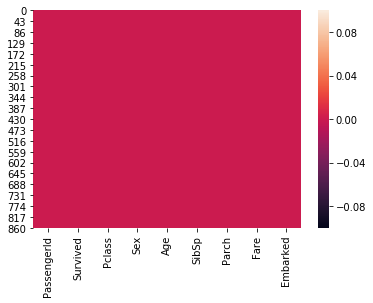

In [43]:
sns.heatmap(df_titanic.isnull())

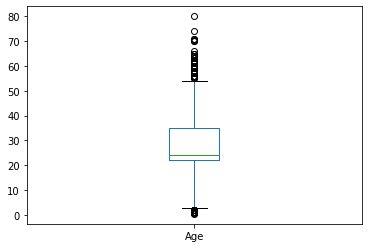

In [44]:
df_titanic['Age'].plot.box()

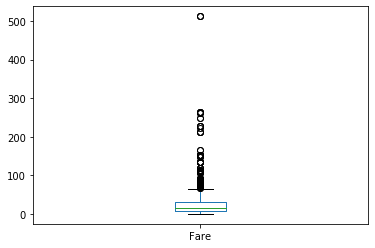

In [45]:
df_titanic['Fare'].plot.box()

In [46]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


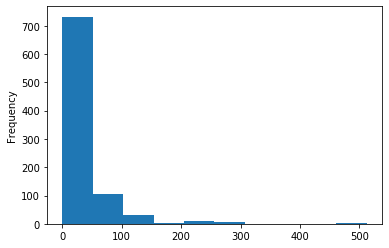

In [47]:
df_titanic['Fare'].plot.hist()

In [50]:
df_titanic['Fare']=np.log(df_titanic['Fare'])

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


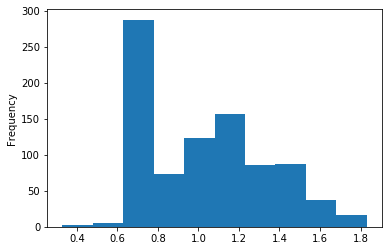

In [51]:
df_titanic['Fare'].plot.hist()

In [52]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           0.445147
Embarked      -1.264823
dtype: float64

In [53]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,876.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,1.033130,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,0.299470,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.328882,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.727559,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,0.983631,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.236291,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.830815,2.000000


In [54]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           0.445147
Embarked      -1.264823
dtype: float64

In [55]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.657753
SibSp          3.695352
Parch          2.749117
Fare           0.445147
Embarked      -1.264823
dtype: float64

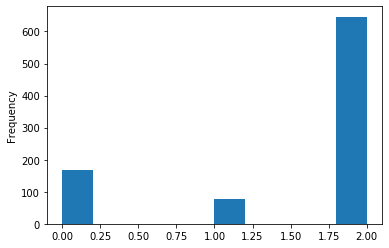

In [56]:
df_titanic['Embarked'].plot.hist()

In [57]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,876.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,1.033130,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,0.299470,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.328882,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.727559,1.000000
50%,446.000000,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,0.983631,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.236291,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.830815,2.000000


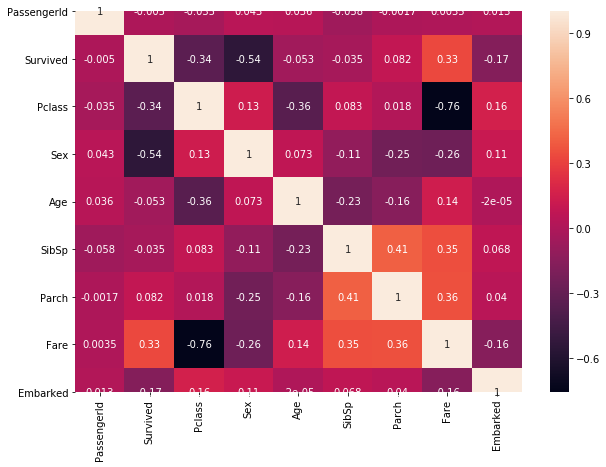

In [58]:
corr_hmap=df_titanic.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [59]:
df_titanic.shape

(891, 9)

In [60]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,0.683603,2
1,2,1,1,0,38.0,1,0,1.450832,0
2,3,1,3,0,26.0,0,0,0.727559,2
3,4,1,1,0,35.0,1,0,1.379314,2
4,5,0,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,0.941939,2
887,888,1,1,0,19.0,0,0,1.224128,2
888,889,0,3,0,24.0,1,2,1.148947,2
889,890,1,1,1,26.0,0,0,1.224128,0


In [61]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

In [62]:
y=df_titanic.loc[:,"Survived"]

In [63]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [70]:
del df_titanic['PassengerId']

In [71]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0.683603,2
1,1,1,0,38.0,1,0,1.450832,0
2,1,3,0,26.0,0,0,0.727559,2
3,1,1,0,35.0,1,0,1.379314,2
4,0,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.941939,2
887,1,1,0,19.0,0,0,1.224128,2
888,0,3,0,24.0,1,2,1.148947,2
889,1,1,1,26.0,0,0,1.224128,0


In [72]:
x=df_titanic.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [73]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0.683603,2
1,1,0,38.0,1,0,1.450832,0
2,3,0,26.0,0,0,0.727559,2
3,1,0,35.0,1,0,1.379314,2
4,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0.941939,2
887,1,0,19.0,0,0,1.224128,2
888,3,0,24.0,1,2,1.148947,2
889,1,1,26.0,0,0,1.224128,0


In [74]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0.683603,2
1,1,1,0,38.0,1,0,1.450832,0
2,1,3,0,26.0,0,0,0.727559,2
3,1,1,0,35.0,1,0,1.379314,2
4,0,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.941939,2
887,1,1,0,19.0,0,0,1.224128,2
888,0,3,0,24.0,1,2,1.148947,2
889,1,1,1,26.0,0,0,1.224128,0


In [75]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0.683603,2
1,1,0,38.0,1,0,1.450832,0
2,3,0,26.0,0,0,0.727559,2
3,1,0,35.0,1,0,1.379314,2
4,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0.941939,2
887,1,0,19.0,0,0,1.224128,2
888,3,0,24.0,1,2,1.148947,2
889,1,1,26.0,0,0,1.224128,0


In [76]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [77]:
scale = MinMaxScaler()

In [78]:
x=scale.fit_transform(x)

In [79]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.22,random_state=42)

In [80]:
x_train.shape

(694, 7)

In [81]:
y_train.shape

(694,)

In [82]:
x_test.shape

(197, 7)

In [83]:
y_test.shape

(197,)

In [84]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0.683603,2
1,1,1,0,38.0,1,0,1.450832,0
2,1,3,0,26.0,0,0,0.727559,2
3,1,1,0,35.0,1,0,1.379314,2
4,0,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.941939,2
887,1,1,0,19.0,0,0,1.224128,2
888,0,3,0,24.0,1,2,1.148947,2
889,1,1,1,26.0,0,0,1.224128,0


In [85]:
df_titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,876.000000,891.000000
mean,0.383838,2.308642,0.647587,28.566970,0.523008,0.381594,1.033130,1.536476
std,0.486592,0.836071,0.477990,13.199572,1.102743,0.806057,0.299470,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.328882,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.727559,1.000000
50%,0.000000,3.000000,1.000000,24.000000,0.000000,0.000000,0.983631,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.236291,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,1.830815,2.000000


In [86]:
df_titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare        15
Embarked     0
dtype: int64

In [87]:
df_titanic['Fare'].fillna(df_titanic['Fare'].mode()[0], inplace=True)

In [88]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [89]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [92]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,0.683603,2
1,1,1,0,38.0,1,0,1.450832,0
2,1,3,0,26.0,0,0,0.727559,2
3,1,1,0,35.0,1,0,1.379314,2
4,0,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,0.941939,2
887,1,1,0,19.0,0,0,1.224128,2
888,0,3,0,24.0,1,2,1.148947,2
889,1,1,1,26.0,0,0,1.224128,0


In [93]:
x=df_titanic.loc[:,["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]

In [94]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0.683603,2
1,1,0,38.0,1,0,1.450832,0
2,3,0,26.0,0,0,0.727559,2
3,1,0,35.0,1,0,1.379314,2
4,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0.941939,2
887,1,0,19.0,0,0,1.224128,2
888,3,0,24.0,1,2,1.148947,2
889,1,1,26.0,0,0,1.224128,0


In [95]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [96]:
lr = LogisticRegression()

In [97]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [98]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,0.683603,2
1,1,0,38.0,1,0,1.450832,0
2,3,0,26.0,0,0,0.727559,2
3,1,0,35.0,1,0,1.379314,2
4,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,0.941939,2
887,1,0,19.0,0,0,1.224128,2
888,3,0,24.0,1,2,1.148947,2
889,1,1,26.0,0,0,1.224128,0


In [99]:
x_train.shape

(694, 7)

In [100]:
x_test.shape

(197, 7)

In [101]:
y_train.shape

(694,)

In [102]:
y_test.shape

(197,)

In [103]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [105]:
df_titanic = df_titanic.reset_index()

In [106]:
df_titanic

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,0.683603,2
1,1,1,1,0,38.0,1,0,1.450832,0
2,2,1,3,0,26.0,0,0,0.727559,2
3,3,1,1,0,35.0,1,0,1.379314,2
4,4,0,3,1,35.0,0,0,0.735091,2
...,...,...,...,...,...,...,...,...,...
886,886,0,2,1,27.0,0,0,0.941939,2
887,887,1,1,0,19.0,0,0,1.224128,2
888,888,0,3,0,24.0,1,2,1.148947,2
889,889,1,1,1,26.0,0,0,1.224128,0


In [107]:
lr = LogisticRegression()

In [108]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [109]:
pd.isnull(x_train).sum() > 0

True

In [111]:
df_titanic.isnull().any()

index       False
Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [112]:
pd.isnull(df_titanic).sum() > 0

index       False
Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'